### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('/content/drive/MyDrive/1.Berkeley/1.Section 1/5.M5-GitHup Practical Application 1/data/coupons.csv')

In [27]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


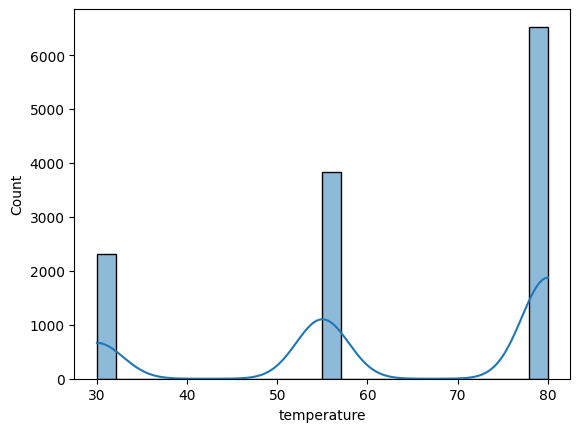

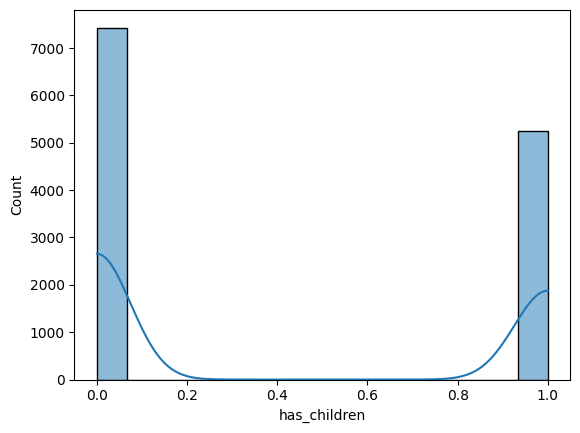

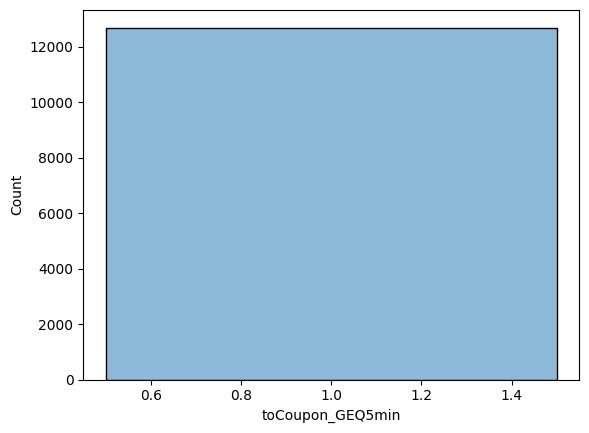

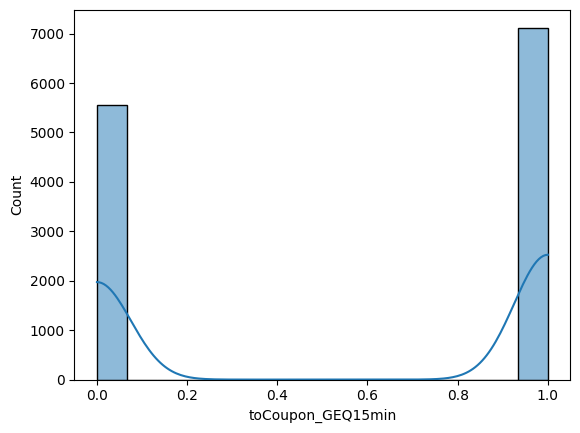

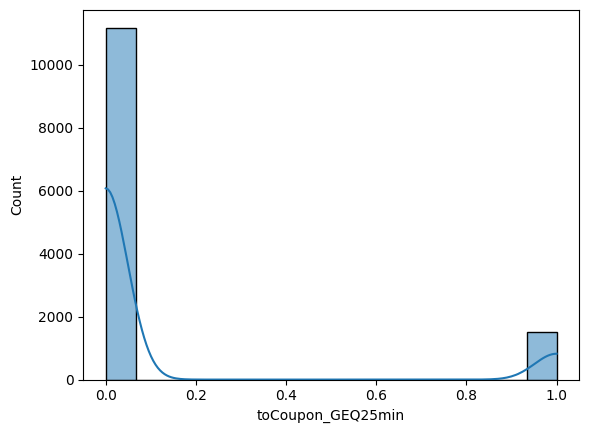

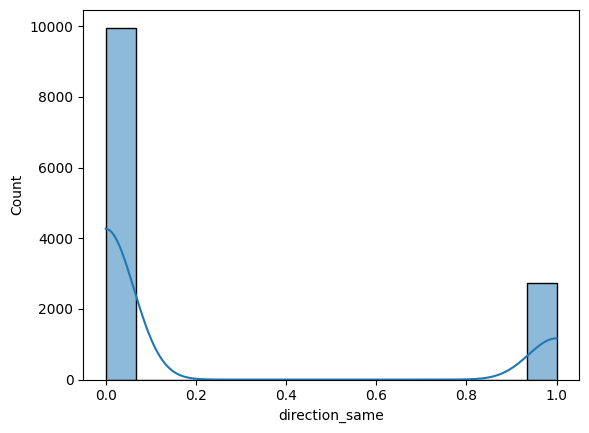

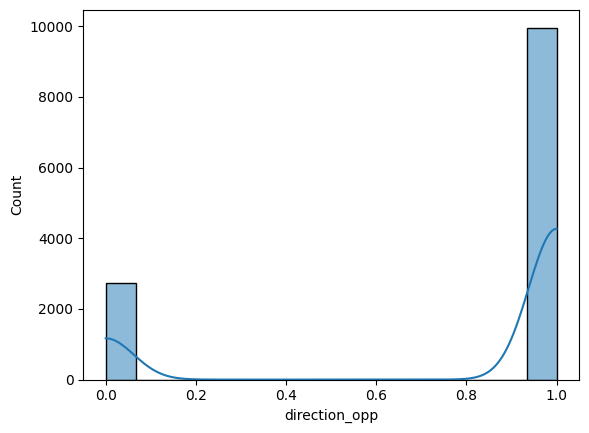

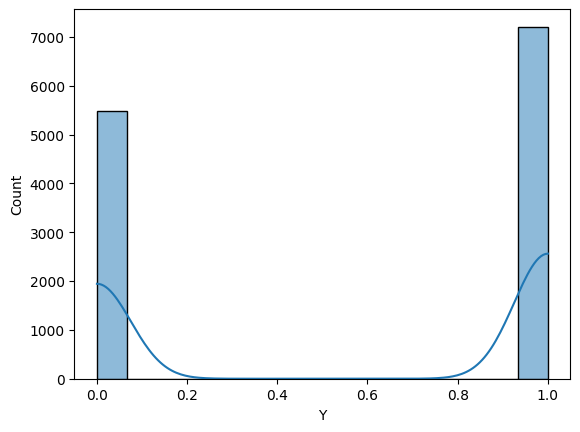

In [8]:
#data.select_dtypes(include='int64').columns
#sns.boxplot(data=data,x='has_children')
#data.describe()
#sns.barplot(data=data,x='has_children')
#sns.histplot(data = data, kde = True)
for col in data.select_dtypes(include='int64').columns:
  sns.histplot(data[col], kde = True)
  plt.show()

In [9]:
for col in data.select_dtypes(include='int64').columns:
  print(col)
  print(data[col].unique())
  print('\n')

temperature
[55 80 30]


has_children
[1 0]


toCoupon_GEQ5min
[1]


toCoupon_GEQ15min
[0 1]


toCoupon_GEQ25min
[0 1]


direction_same
[0 1]


direction_opp
[1 0]


Y
[1 0]




In [10]:

#data['car'].value_counts(normalize=True)
#data.info()
#data.describe()
#data.isna().sum()
#data['car'].value_counts()
#data.value_counts()
#data.select_dtypes(include='object').columns

for col in data.select_dtypes(include='object').columns:
  print(data[col].value_counts(dropna=False, normalize=True))
  print('\n')

destination
No Urgent Place    0.495348
Home               0.255203
Work               0.249448
Name: proportion, dtype: float64


passanger
Alone        0.575922
Friend(s)    0.260013
Partner      0.084752
Kid(s)       0.079313
Name: proportion, dtype: float64


weather
Sunny    0.793835
Snowy    0.110769
Rainy    0.095396
Name: proportion, dtype: float64


time
6PM     0.254652
7AM     0.249448
10AM    0.179360
2PM     0.158389
10PM    0.158152
Name: proportion, dtype: float64


coupon
Coffee House             0.315043
Restaurant(<20)          0.219647
Carry out & Take away    0.188663
Bar                      0.159019
Restaurant(20-50)        0.117629
Name: proportion, dtype: float64


expiration
1d    0.559051
2h    0.440949
Name: proportion, dtype: float64


gender
Female    0.513324
Male      0.486676
Name: proportion, dtype: float64


age
21         0.209161
26         0.201750
31         0.160754
50plus     0.140965
36         0.103989
41         0.086172
46         0.054084
be

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#Drop column 'car'
dataProc = data.drop('car', axis=1)

#Delete rows with null values for the rest of columns
dataProc.dropna(inplace = True)

#Check data
dataProc.info()

print(f'\n After the missing data treatment, it is maintained the {(dataProc.shape[0]/data.shape[0])*100}% of the initial dataset')

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [12]:

print(f'\n The proportion of the total observations that accept the coupon is {dataProc["Y"].value_counts(normalize=True)[1]*100}%')



 The proportion of the total observations that accept the coupon is 56.93352098683666%


5. Use a bar plot to visualize the `coupon` column.

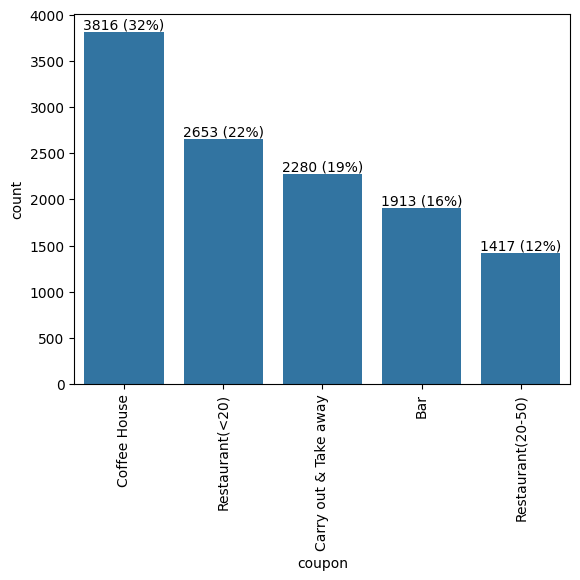

In [14]:
ax = sns.countplot(x=dataProc['coupon'],
                   order=dataProc['coupon'].value_counts(ascending=False).index);

abs_values = dataProc['coupon'].value_counts(ascending=False)
rel_values = dataProc['coupon'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.xticks(rotation=90)
plt.show()

6. Use a histogram to visualize the temperature column.

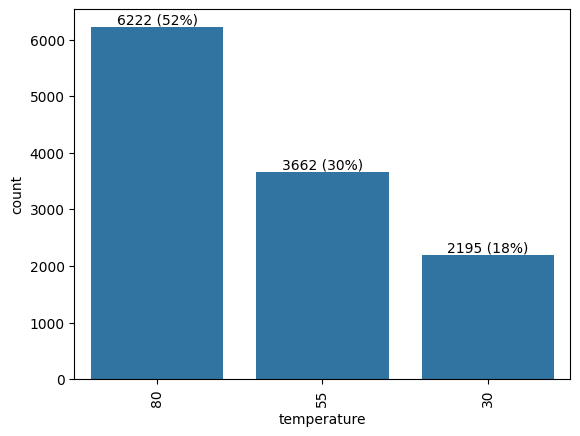

In [15]:
ax = sns.countplot(x=dataProc['temperature'],
                   order=dataProc['temperature'].value_counts(ascending=False).index);

abs_values = dataProc['temperature'].value_counts(ascending=False).values
rel_values = dataProc['temperature'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.xticks(rotation=90)
plt.show()

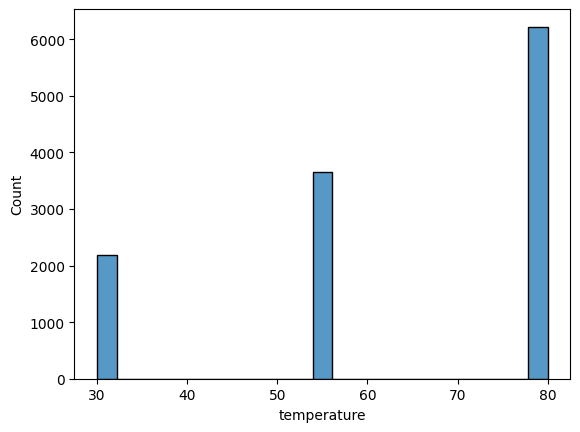

In [16]:
sns.histplot(data=dataProc, x='temperature', kde = False)
plt.show()

Additional Step: Setting format to variables

In [17]:
#dataProc.to_excel('dataProc.xlsx')
#dataProc.info()
#adult["Marital Status"].astype("category")

#Converting type Object to Category
for col in dataProc.select_dtypes(include='object').columns:
  dataProc[col] = dataProc[col].astype('category')

dataProc['temperature'] = dataProc['temperature'].astype(str).astype('category')



#Converting to Boolean type
dataProc['has_children'] = dataProc['has_children'].astype('bool')
dataProc['toCoupon_GEQ5min'] = dataProc['toCoupon_GEQ5min'].astype('bool')
dataProc['toCoupon_GEQ15min'] = dataProc['toCoupon_GEQ15min'].astype('bool')
dataProc['toCoupon_GEQ25min'] = dataProc['toCoupon_GEQ25min'].astype('bool')
dataProc['direction_same'] = dataProc['direction_same'].astype('bool')
dataProc['direction_opp'] = dataProc['direction_opp'].astype('bool')
dataProc['Y'] = dataProc['Y'].astype('bool')


dataProc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12079 non-null  category
 1   passanger             12079 non-null  category
 2   weather               12079 non-null  category
 3   temperature           12079 non-null  category
 4   time                  12079 non-null  category
 5   coupon                12079 non-null  category
 6   expiration            12079 non-null  category
 7   gender                12079 non-null  category
 8   age                   12079 non-null  category
 9   maritalStatus         12079 non-null  category
 10  has_children          12079 non-null  bool    
 11  education             12079 non-null  category
 12  occupation            12079 non-null  category
 13  income                12079 non-null  category
 14  Bar                   12079 non-null  category
 15  Coffee

In [18]:
#Adding ordinality to some categories
dataProc['temperature'] = dataProc['temperature'].cat.set_categories(new_categories=["30","55","80"], ordered=True)
dataProc['time'] = dataProc['time'].cat.set_categories(new_categories=["7AM","10AM","2PM","6PM","10PM"], ordered=True)
dataProc['expiration'] = dataProc['expiration'].cat.set_categories(new_categories=["2h","1d"], ordered=True)
dataProc['age'] = dataProc['age'].cat.set_categories(new_categories=['below21','21','26','31','36','41','46','50plus'], ordered=True)
dataProc['education'] = dataProc['education'].cat.set_categories(new_categories=['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)'], ordered=True)
dataProc['income'] = dataProc['income'].cat.set_categories(new_categories=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'], ordered=True)
dataProc['Bar'] = dataProc['Bar'].cat.set_categories(new_categories=['never','less1','1~3','4~8','gt8'], ordered=True)
dataProc['CoffeeHouse'] = dataProc['CoffeeHouse'].cat.set_categories(new_categories=['never','less1','1~3','4~8','gt8'], ordered=True)
dataProc['CarryAway'] = dataProc['CarryAway'].cat.set_categories(new_categories=['never','less1','1~3','4~8','gt8'], ordered=True)
dataProc['RestaurantLessThan20'] = dataProc['RestaurantLessThan20'].cat.set_categories(new_categories=['never','less1','1~3','4~8','gt8'], ordered=True)
dataProc['Restaurant20To50'] = dataProc['Restaurant20To50'].cat.set_categories(new_categories=['never','less1','1~3','4~8','gt8'], ordered=True)

#dataProc[''] = dataProc[''].cat.set_categories(new_categories=[], ordered=True)
#dataProc['Restaurant20To50'].value_counts().sort_index()
#print(dataProc['Restaurant20To50'].head(3))



In [19]:
dataProc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12079 non-null  category
 1   passanger             12079 non-null  category
 2   weather               12079 non-null  category
 3   temperature           12079 non-null  category
 4   time                  12079 non-null  category
 5   coupon                12079 non-null  category
 6   expiration            12079 non-null  category
 7   gender                12079 non-null  category
 8   age                   12079 non-null  category
 9   maritalStatus         12079 non-null  category
 10  has_children          12079 non-null  bool    
 11  education             12079 non-null  category
 12  occupation            12079 non-null  category
 13  income                12079 non-null  category
 14  Bar                   12079 non-null  category
 15  Coffee

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
dataBar = dataProc[dataProc['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [21]:
print(f'The proportion of bar coupons that were accepted is {dataBar["Y"].value_counts(normalize=True)[1]*100}%')


The proportion of bar coupons that were accepted is 41.19184526921067%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


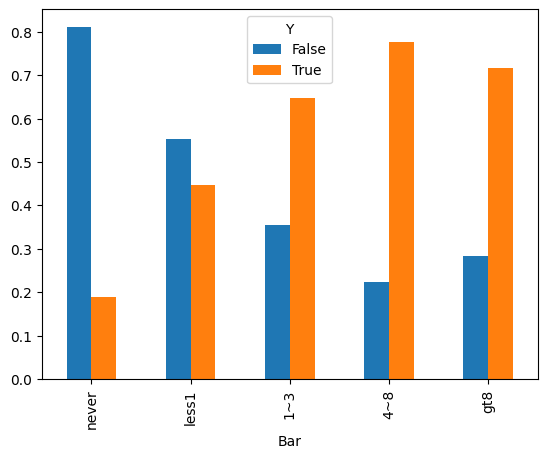

ANSWER: People who tend to go more than 3 times to a bar have a better response rate than the others.


In [22]:
#dataBar['Bar'].value_counts(normalize=True).plot(kind='bar')
#sns.barplot(data=dataBar, x='Bar', hue='Y')
#plt.show()
#dataBar.groupby('Bar')['Y'].value_counts(normalize=True)

dataBar.groupby('Bar')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

print('ANSWER: People who tend to go more than 3 times to a bar have a better response rate than the others.')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


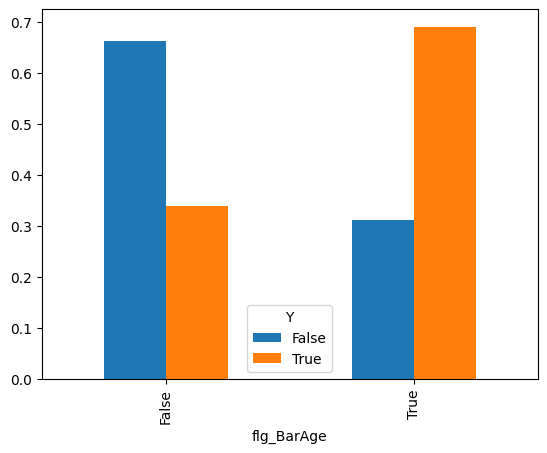

ANSWER: Yes, there is a difference. The response rate is almost 2x (~70% vs. ~35%)


In [23]:
#dataBar[dataBar['Bar'].isin(['1~3','4~8','gt8'])].groupby('age')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')

dataBar['flg_BarAge'] = np.where((dataBar['age'].isin(['26','31','36','41','46','50plus'])) & (dataBar['Bar'].isin(['1~3','4~8','gt8'])), True, False)

dataBar.groupby('flg_BarAge')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

print('ANSWER: Yes, there is a difference. The response rate is almost 2x (~70% vs. ~35%)')



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


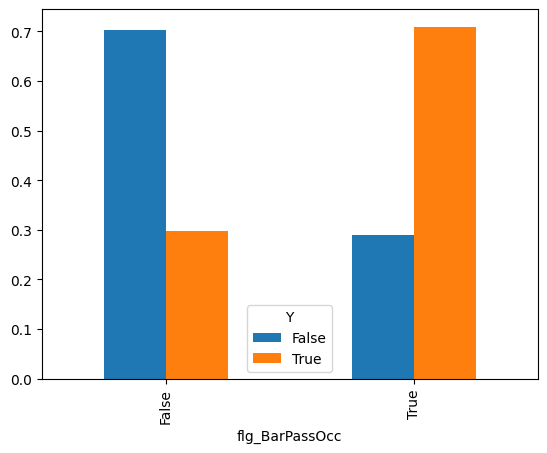

ANSWER: Yes, there is a difference. The response rate is almost 2x


In [24]:
dataBar['flg_BarPassOcc'] = np.where((~dataBar['passanger'].isin(['Kid(s)'])) & (~dataBar['occupation'].isin(['Farming Fishing & Forestry'])) & (dataBar['Bar'].isin(['1~3','4~8','gt8'])), True, False)

dataBar.groupby('flg_BarPassOcc')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

print('ANSWER: Yes, there is a difference. The response rate is almost 2x')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



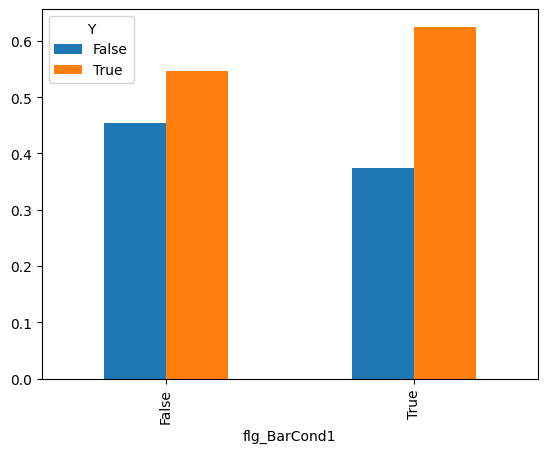

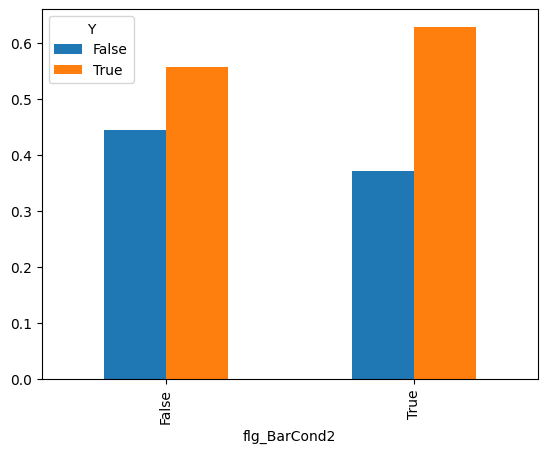

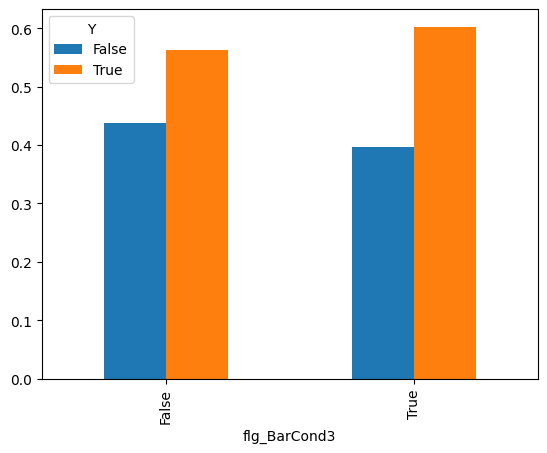

In [25]:
#dataProc[dataProc['coupon'] == 'Bar']
dataProc['flg_BarCond1'] = np.where((~dataProc['passanger'].isin(['Kid(s)'])) & (~dataProc['maritalStatus'].isin(['Widowed'])) & (dataProc['Bar'].isin(['1~3','4~8','gt8'])), True, False)
dataProc['flg_BarCond2'] = np.where((dataProc['age'].isin(['below21','21','26'])) & (dataProc['Bar'].isin(['1~3','4~8','gt8'])), True, False)
dataProc['flg_BarCond3'] = np.where((dataProc['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])) & (dataProc['RestaurantLessThan20'].isin(['4~8','gt8'])), True, False)

dataProc.groupby('flg_BarCond1')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')
dataProc.groupby('flg_BarCond2')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')
dataProc.groupby('flg_BarCond3')['Y'].value_counts(normalize=True).unstack().plot(kind='bar')

plt.show()





7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [26]:
print("CONCLUSION: Drivers who don't have kids as passengers and are not widowed tend to have a higher response ratio, also is important that drivers use to go to Bars at least once a month. It is important to mention that drivers who go to cheap restaurants can be good candidates for Bar coupons.")

CONCLUSION: Drivers who don't have kids as passengers and are not widowed tend to have a higher response ratio, also is important that drivers use to go to Bars at least once a month. It is important to mention that drivers who go to cheap restaurants can be good candidates for Bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

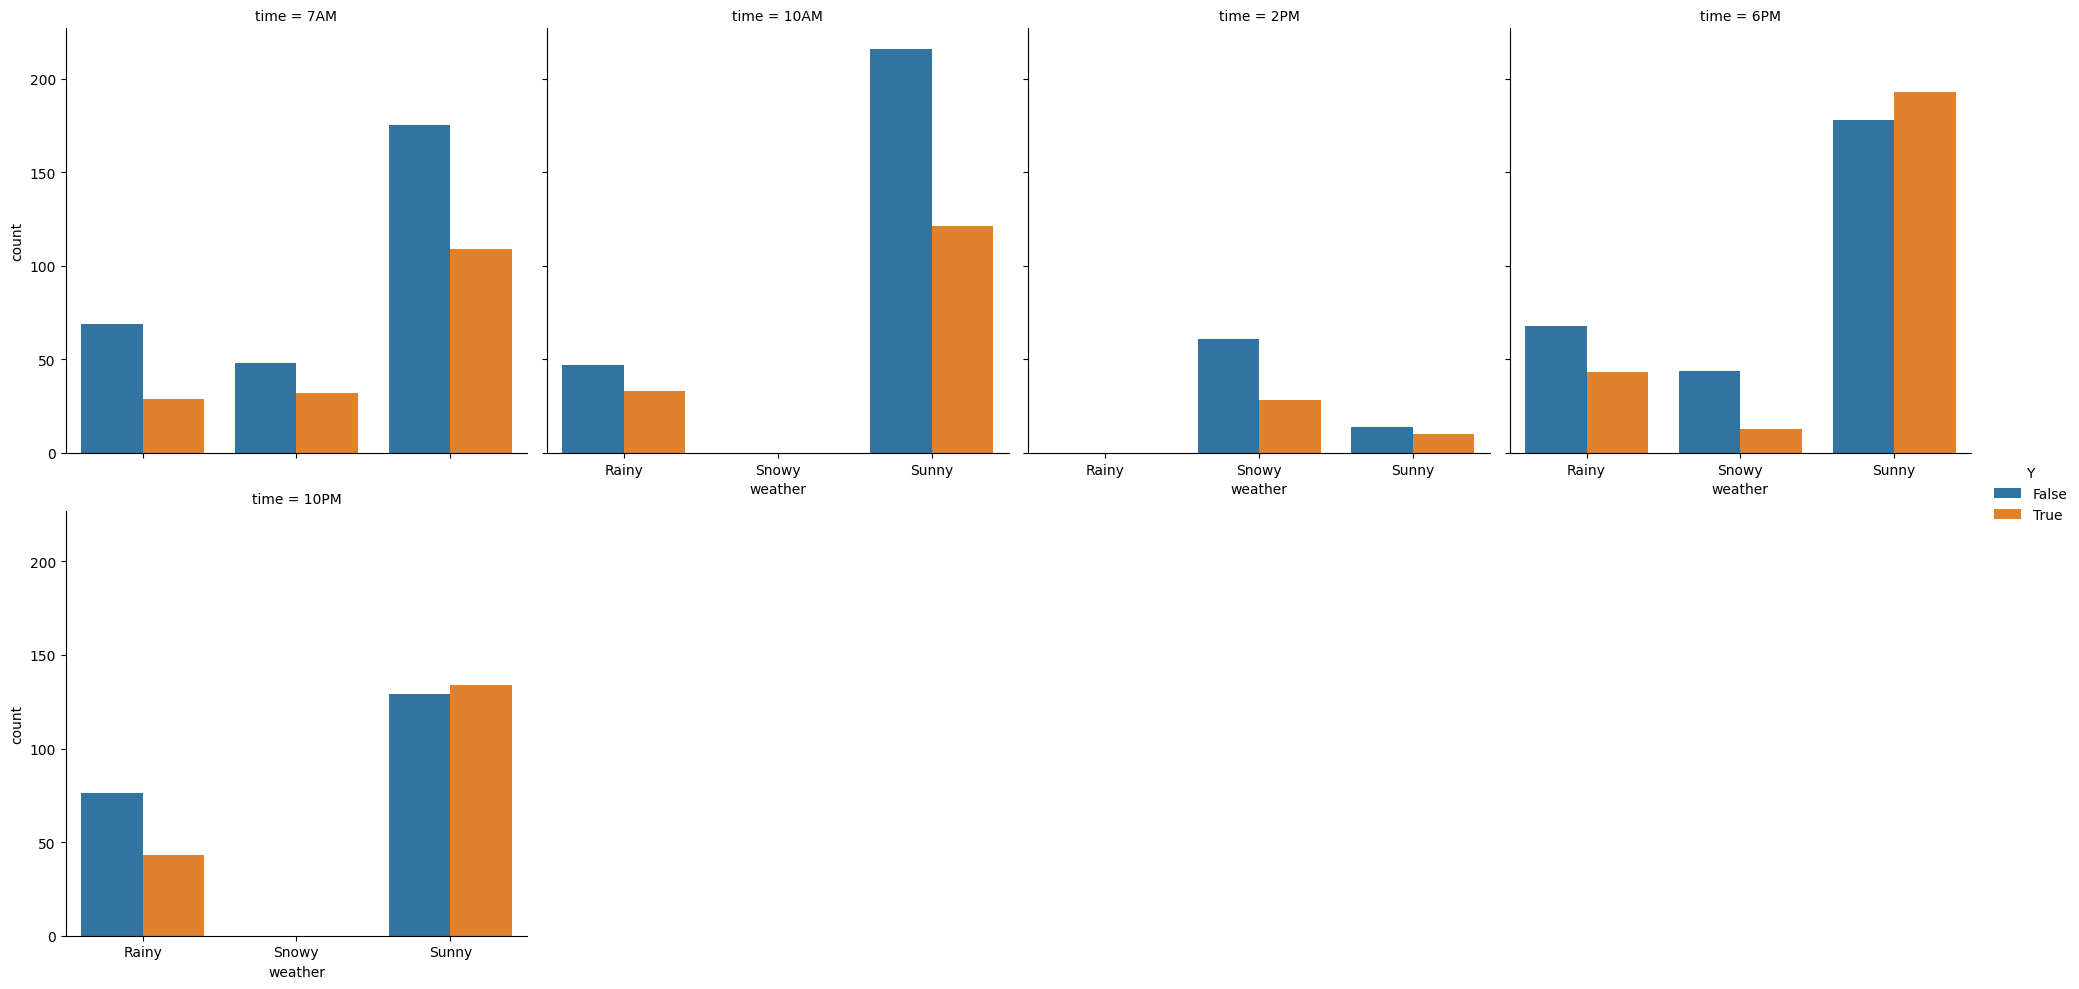

COMMENT: Sunny weather and 6PM is the better time for the bar coupons


In [47]:
sns.catplot(data=dataBar, x='weather', col='time', hue='Y', kind='count', col_wrap=4)
plt.show()
print('COMMENT: Sunny weather and 6PM is the better time for the bar coupons')

In [31]:
dataProc.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,flg_BarCond1,flg_BarCond2,flg_BarCond3
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,True,False,False,False,True,True,False,False,False
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,True,False,False,False,True,False,False,False,False
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,True,False,False,False,True,True,False,False,False
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,True,True,False,False,True,False,False,False,False
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,False,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,True,False,False,False,True,False,False,False,False


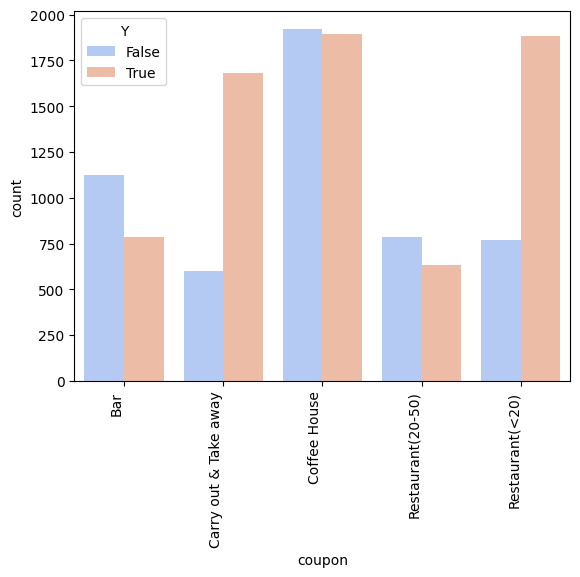

COMMENT: Coffe House has the highest count of coupons.


In [48]:
sns.countplot(data=dataProc, x='coupon', hue='Y', palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.show()
print('COMMENT: Coffe House has the highest count of coupons.')

In [51]:
dataCof = dataProc[dataProc['coupon'] == 'Coffee House']

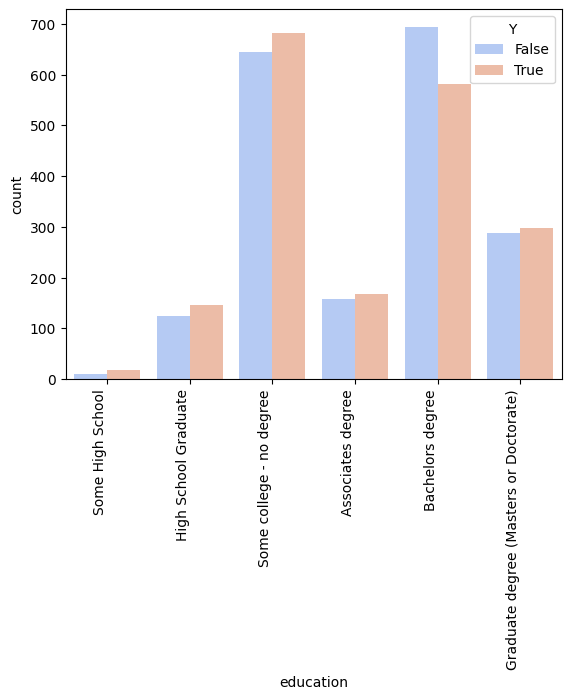

COMMENT: College students and Bachelors degree have the higher count of accepted coupons. So they are the potential market


In [56]:
sns.countplot(data=dataCof, x='education', hue='Y', palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.show()
print('COMMENT: College students and Bachelors degree have the higher count of accepted coupons. So they are the potential market')

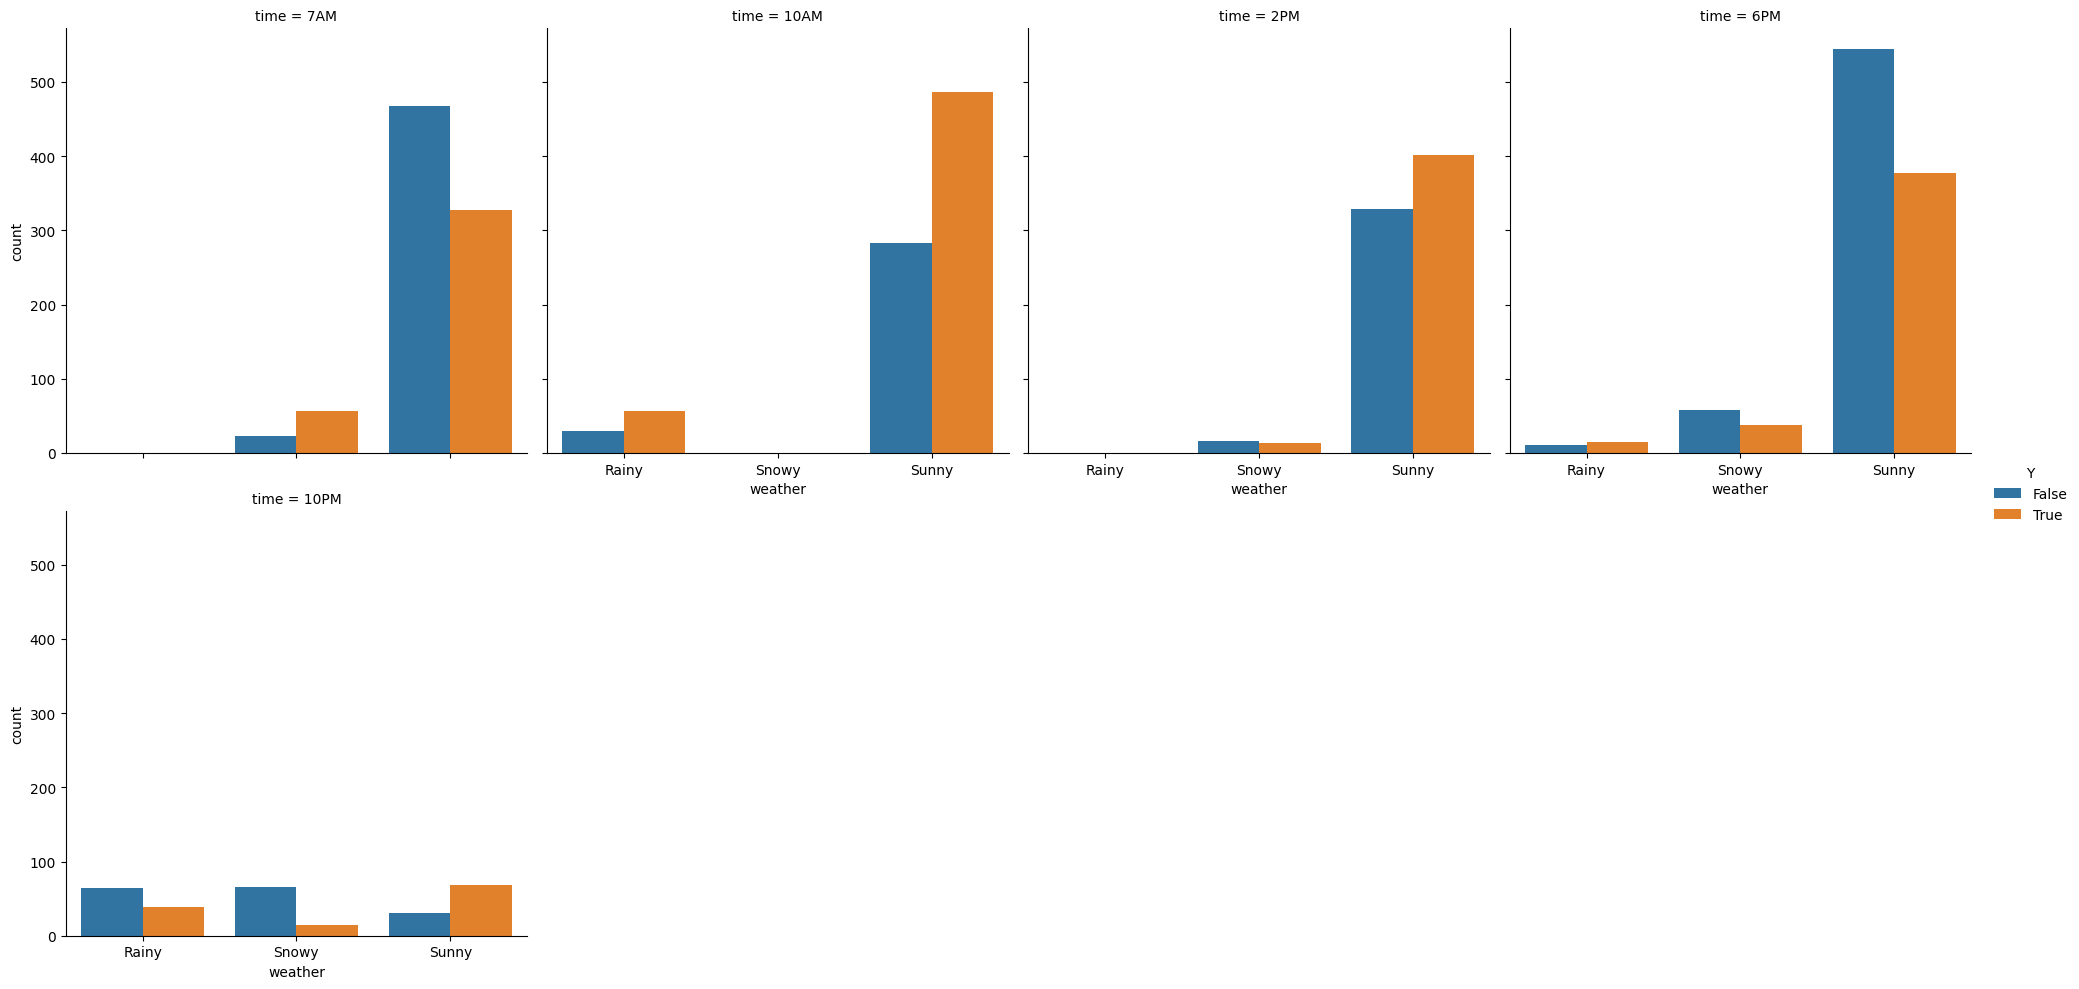

In [53]:
sns.catplot(data=dataCof, x='weather', col='time', hue='Y', kind='count', col_wrap=4)
plt.show()
print('COMMENT: Sunny weather and 10AM is the better time for the coffee coupons')

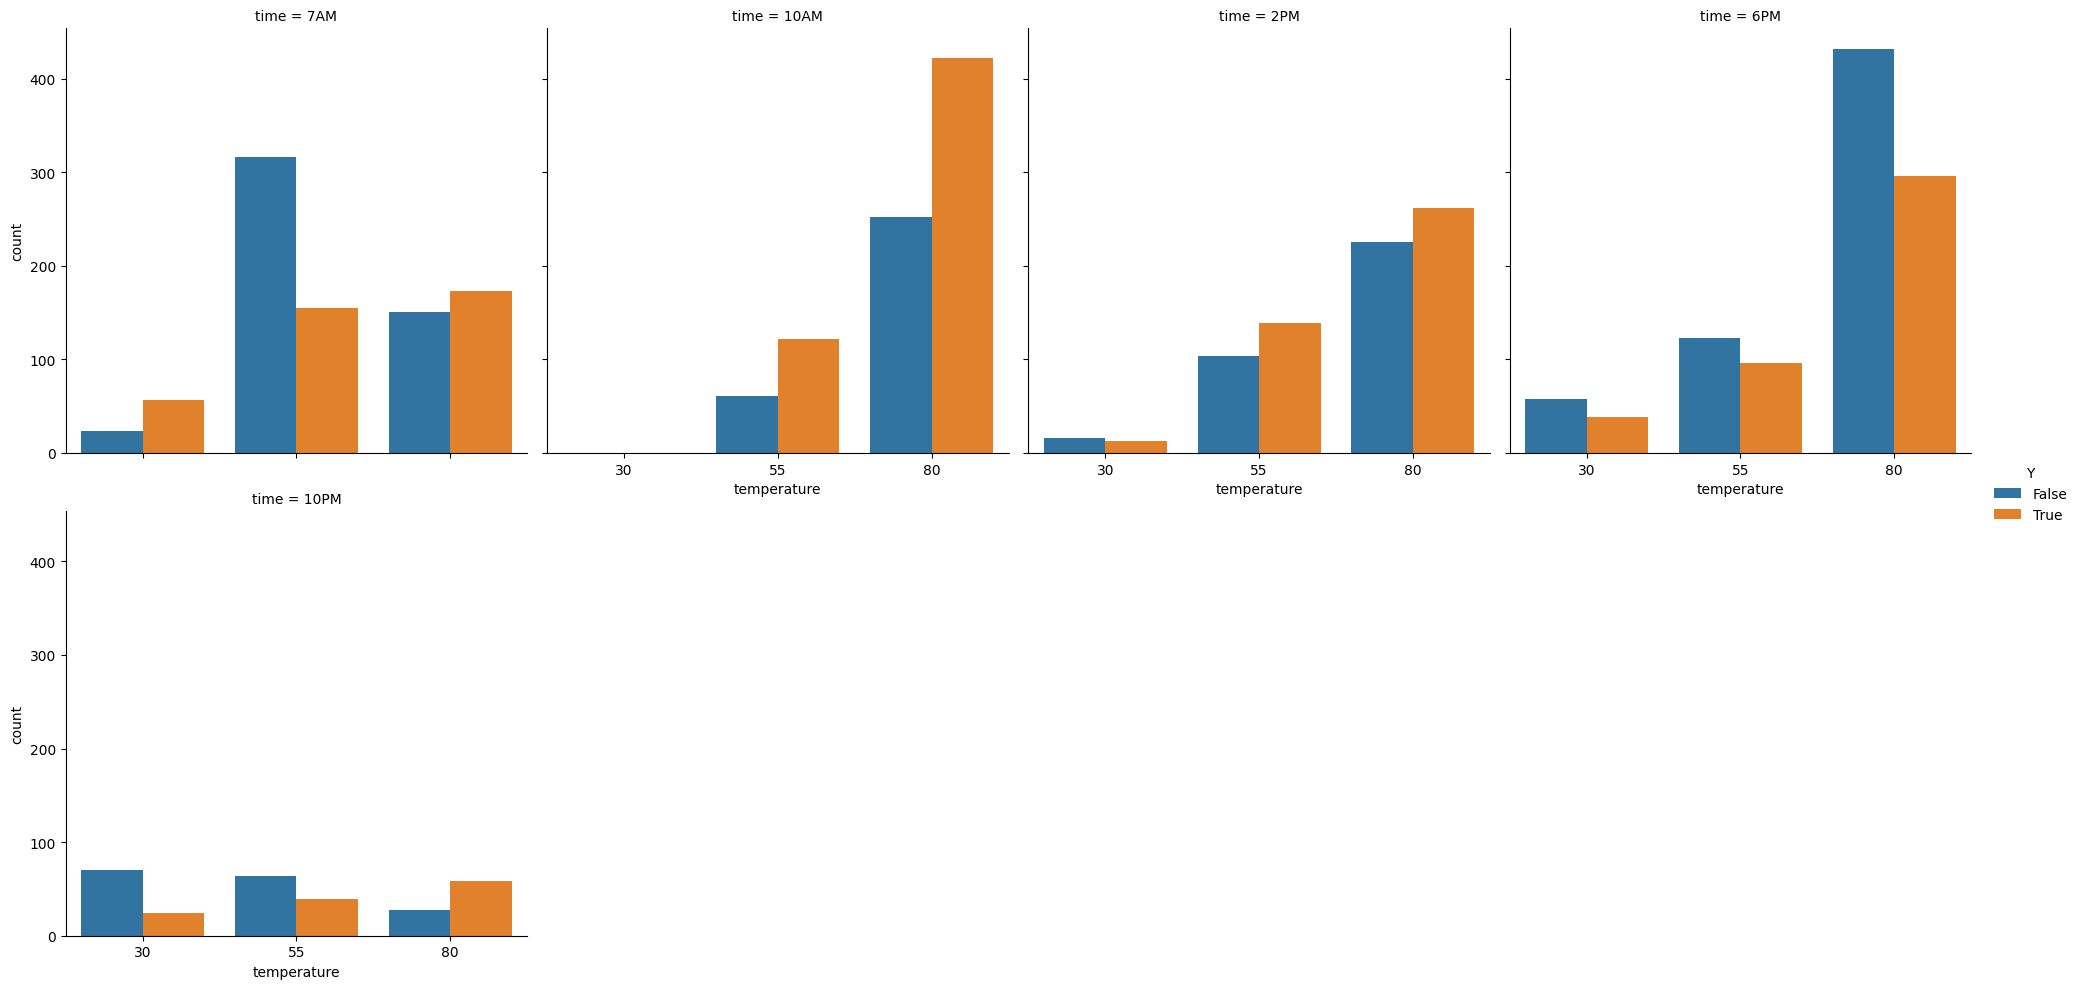

COMMENT: If temperature is 80 is more likely to accept the coupon.


In [59]:
sns.catplot(data=dataCof, x='temperature', col='time', hue='Y', kind='count', col_wrap=4)
plt.show()
print('COMMENT: If temperature is 80 is more likely to accept the coupon.')